<a href="https://colab.research.google.com/github/Priyanshi614/ML_SEM6_CE017/blob/main/ML_LAB11_CE017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=70)
import pandas as pd

df = pd.DataFrame(X, columns=["X", "Y"])
df.head()

,X,Y
0,1.439826,8.746026
1,8.007462,7.969629
2,8.405430,6.490555
3,3.957685,9.782386
4,0.006509,7.891115


In [3]:
y

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

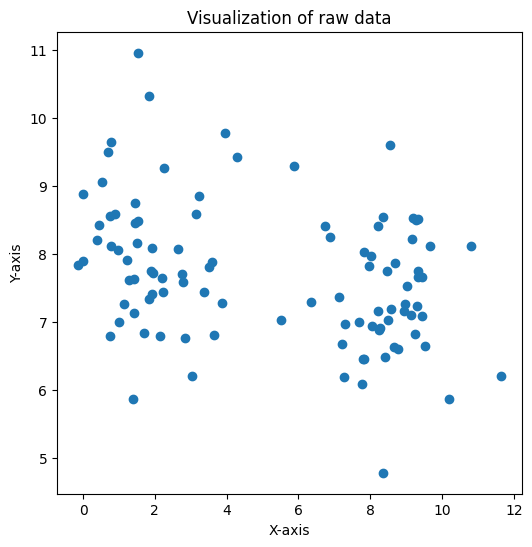

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter( df["X"], df["Y"])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of raw data');

In [5]:
# Split data to train and test on 80-20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100))

Accuracy: 100.0%


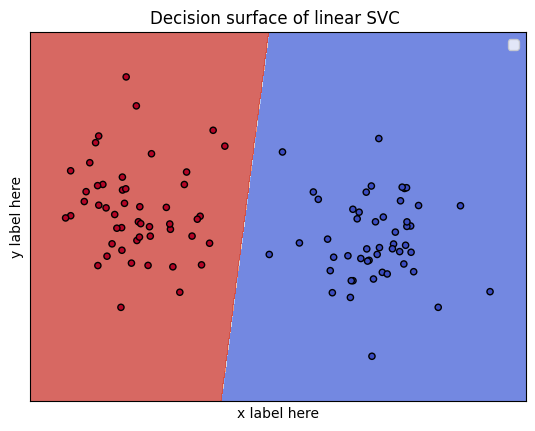

In [7]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [8]:
# accuracy, recall, precision
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, average="micro")
print("precision: ", precision)

recall = recall_score(y_test, y_pred, average="micro")
print("recall: ", recall)

precision:  1.0
recall:  1.0


In [9]:
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()
# print the names of the 13 features
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# print the label type of cancer('malignant' 'benign')
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# print the cancer labels (0:malignant, 1:benign)
df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
X = cancer.data
y = df["target"]

(569, 2)


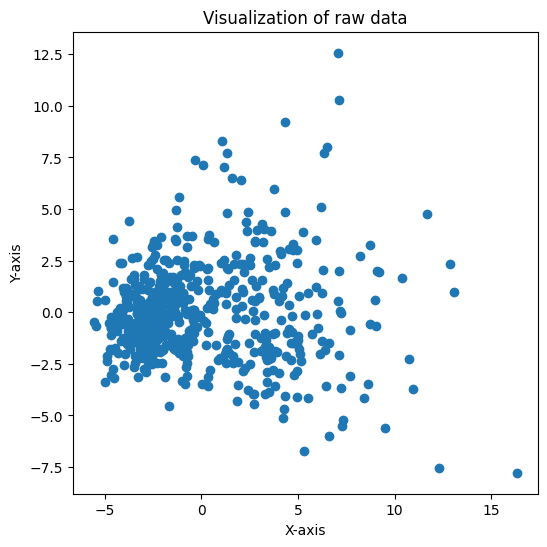

In [15]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
df_1 = pd.DataFrame(X_std_pca, columns=["x", "y"])

# scatter
plt.figure(figsize=(6, 6))
plt.scatter( df_1["x"], df_1["y"])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of raw data');
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X)

# reducing features using PCA
pca = decomposition.PCA(n_components=2)

X_std_pca = pca.fit_transform(X_std)
print(X_std_pca.shape)

In [16]:
#Import svm model
clf_bc = svm.SVC(kernel='linear')


#Train the model using the training sets
X_train, X_test, y_train, y_test = train_test_split(X_std_pca, y, test_size=0.2, random_state=70)
clf_bc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_bc.predict(X_test)
# accuracy
print("Accuracy: {}%".format(clf_bc.score(X_test, y_test) * 100))

Accuracy: 92.98245614035088%


In [17]:
# recall, precision
from sklearn.metrics import precision_score, recall_score

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, average="micro")
print("precision: ", precision)

recall = recall_score(y_test, y_pred, average="micro")
print("recall: ", recall)

precision:  0.7894736842105263
recall:  0.7894736842105263
